<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/2_elemental_features_of_monk/4)%20Feature%20-%20Compare%20experiments%20-%20compare%20experiments%20across%20backends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals

### 1. Understand how you can compare experiments on same data

### 2. Understand where to look for comparison data - logs, charts, graphs, etc when comparing experiments


### 3. Steps
    - You will use 3 backends - keras, mxnet, and pytorch
    - Train three classifiers by keeping all parameters same and changing backends
    - You will keep the model as resnet50
    - Compare the three experiments

### Why compare experiments

    - One usually runs mulitple experiments on the same data by changing hyper-params, base model, etc
    
    - Hence this compare exxperiments feature helps to see which combination og params works the best for that data

# Table of Contents


## [0. Install](#0)


## [1. Train a classifier using Mxnet backend](#1)


## [2. Train a classifier using Pytorch backend](#2)


## [3. Train a classifier using Keras backend](#3)


## [4. Compare experiments](#4)


## [5. Visualize and study comparison metrics](#5)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 862, done.
remote: Counting objects: 100% (862/862), done.
remote: Compressing objects: 100% (627/627), done.
remote: Total 1905 (delta 417), reused 628 (delta 230), pack-reused 1043
Receiving objects: 100% (1905/1905), 69.53 MiB | 10.64 MiB/s, done.
Resolving deltas: 100% (959/959), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Malarial cell images
    - Credits: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mMEtGIK8UZNCrErXRJR-kutNTaN1zxjC' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mMEtGIK8UZNCrErXRJR-kutNTaN1zxjC" -O malaria_cell.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq malaria_cell.zip

# Imports 

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

<a id='1'></a>
# Train a classifier using Mxnet Backend

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-gluon");

Mxnet Version: 1.5.0

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-gluon
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-gluon/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-gluon
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [4]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="resnet50_v2", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           resnet50_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50_v2
        Num of potentially trainable layers:  105
        Num of actual trainable laye

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [6]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.685, Train-loss: 0.700 | Val-acc: 0.704132, Val-loss: 0.687, | time: 11.8 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.747, Train-loss: 0.610 | Val-acc: 0.823140, Val-loss: 0.397, | time: 11.3 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.790, Train-loss: 0.525 | Val-acc: 0.785124, Val-loss: 0.528, | time: 11.2 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.802, Train-loss: 0.508 | Val-acc: 0.841322, Val-loss: 0.387, | time: 11.3 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.805, Train-loss: 0.485 | Val-acc: 0.720661, Val-loss: 0.836, | time: 11.0 sec

    Training completed in: 0m 54s
    Best val Acc:          0.841322

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-gluon/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-gluon/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:         

<Figure size 432x288 with 0 Axes>

<a id='2'></a>
# Train a classifier using Pytorch Backend

In [5]:
#Using pytorch backend 
from pytorch_prototype import prototype

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [6]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-pytorch");

Pytorch Version: 1.2.0

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-pytorch
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-pytorch/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-pytorch
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [7]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="resnet50", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  107
        Num trainable layers: 1

Optimizer
    Name:         

In [10]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.696, Train-loss: 0.774 | Val-acc: 0.849587, Val-loss: 0.342, | time: 10.3 sec

    Epoch 2/5
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.765, Train-loss: 0.619 | Val-acc: 0.919008, Val-loss: 0.206, | time: 10.2 sec

    Epoch 3/5
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.794, Train-loss: 0.556 | Val-acc: 0.800000, Val-loss: 0.471, | time: 9.7 sec

    Epoch 4/5
    ----------


Epoch     3: reducing learning rate of group 0 to 1.0000e-03.


    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.782, Train-loss: 0.576 | Val-acc: 0.877686, Val-loss: 0.339, | time: 10.0 sec

    Epoch 5/5
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.863, Train-loss: 0.354 | Val-acc: 0.919008, Val-loss: 0.213, | time: 10.0 sec

    Training completed in: 0m 47s
    Best val Acc:          0.919008

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-pytorch/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-pytorch/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  tr

<Figure size 432x288 with 0 Axes>

<a id='3'></a>
# Train a classifier using keras backend

In [8]:
#Using keras-tensorflow backend 
from keras_prototype import prototype

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [9]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-keras");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-keras
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/2_elemental_features_of_monk/workspace/Malaria-Cell/exp-keras/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-keras
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [10]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="resnet50", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 1412 images belonging to 2 classes.
Found 604 images belonging to 2 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 1412
    Num val images:   604
    Num classes:      2

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num layers in model:  

In [14]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
353/353 [==============================] - 13s 37ms/step - loss: 0.5398 - acc: 0.7203 - val_loss: 2.4877 - val_acc: 0.5000

Epoch 00001: saving model to workspace/Malaria-Cell/exp-keras/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 2.48769, saving model to workspace/Malaria-Cell/exp-keras/output/models/best_model.h5

Epoch 00001: saving model to workspace/Malaria-Cell/exp-keras/output/models/intermediate_model_01.h5
Epoch 2/5
353/353 [==============================] - 11s 30ms/step - loss: 0.3988 - acc: 0.8187 - val_loss: 2.1468 - val_acc: 0.5000

Epoch 00002: saving model to workspace/Malaria-Cell/exp-keras/output/models/resume_state.h5

Epoch 00002: val_loss improved from 2.48769 to 2.14675, saving model to workspace/Malaria-Cell/exp-keras/output/models/best_model.h5

Epoch 00002: saving model to workspace/Malaria-Cell/exp-keras/output/models/intermediate_model_02.h5
Epoch 3/5
353/353 [==============================] - 11s 31ms/ste

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Compare experiments

In [25]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [26]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Sample-Comparison-2");

Comparison: - Sample-Comparison-2


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Sample-Comparison-2
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [27]:
gtf.Add_Experiment("Malaria-Cell", "exp-gluon");
gtf.Add_Experiment("Malaria-Cell", "exp-pytorch");
gtf.Add_Experiment("Malaria-Cell", "exp-keras");

Project - Malaria-Cell, Experiment - exp-gluon added
Project - Malaria-Cell, Experiment - exp-pytorch added
Project - Malaria-Cell, Experiment - exp-keras added


### Run Analysis

In [28]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<a id='5'></a>
# Visualize and study comparison metrics

### Training Accuracy Curves

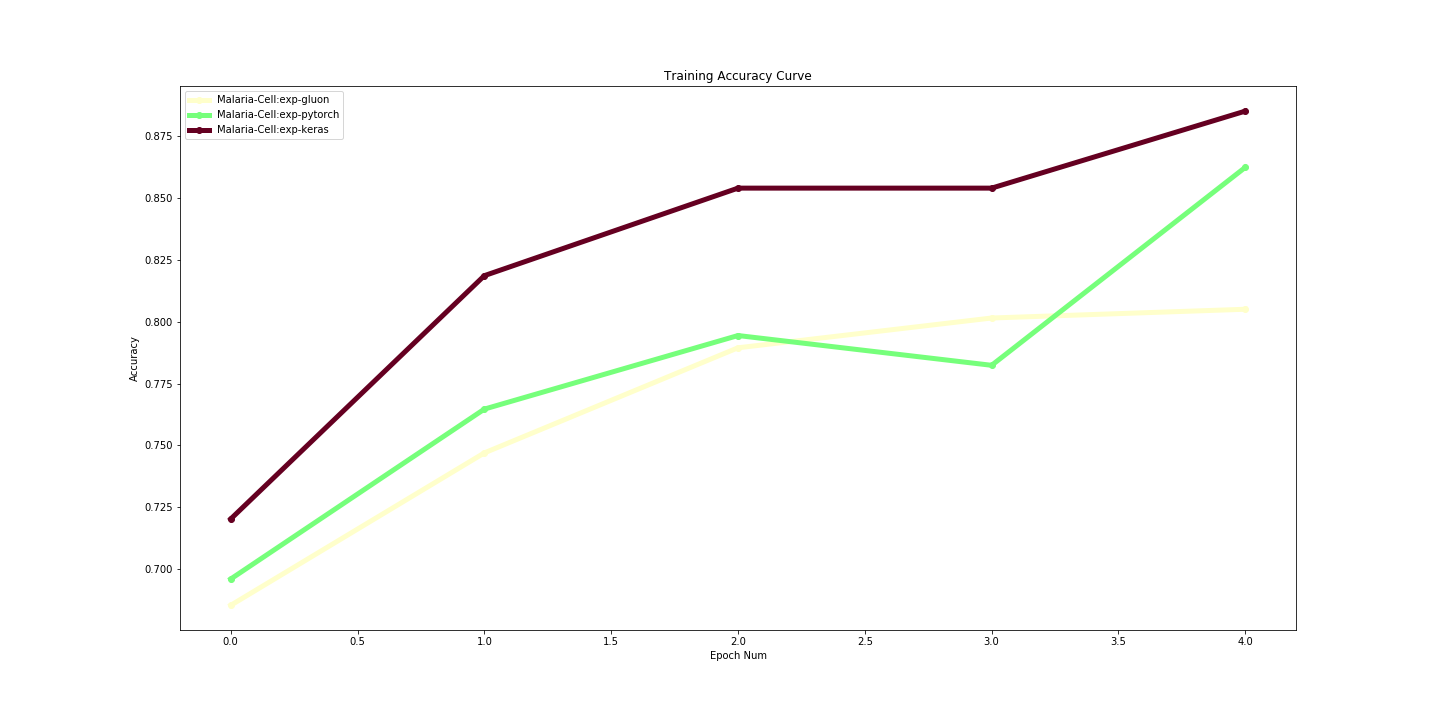

In [29]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/train_accuracy.png") 

### Training Loss Curves

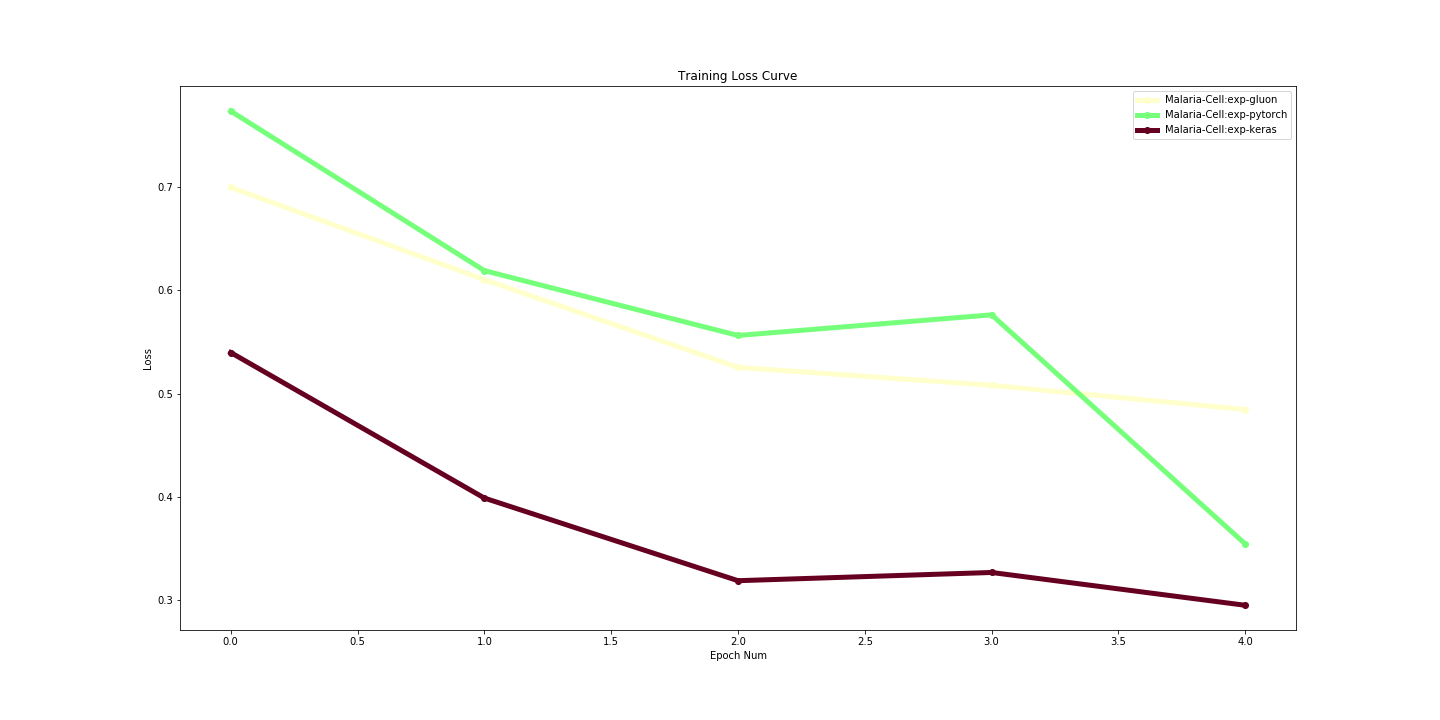

In [30]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/train_loss.png") 

### Validation Accuracy Curves

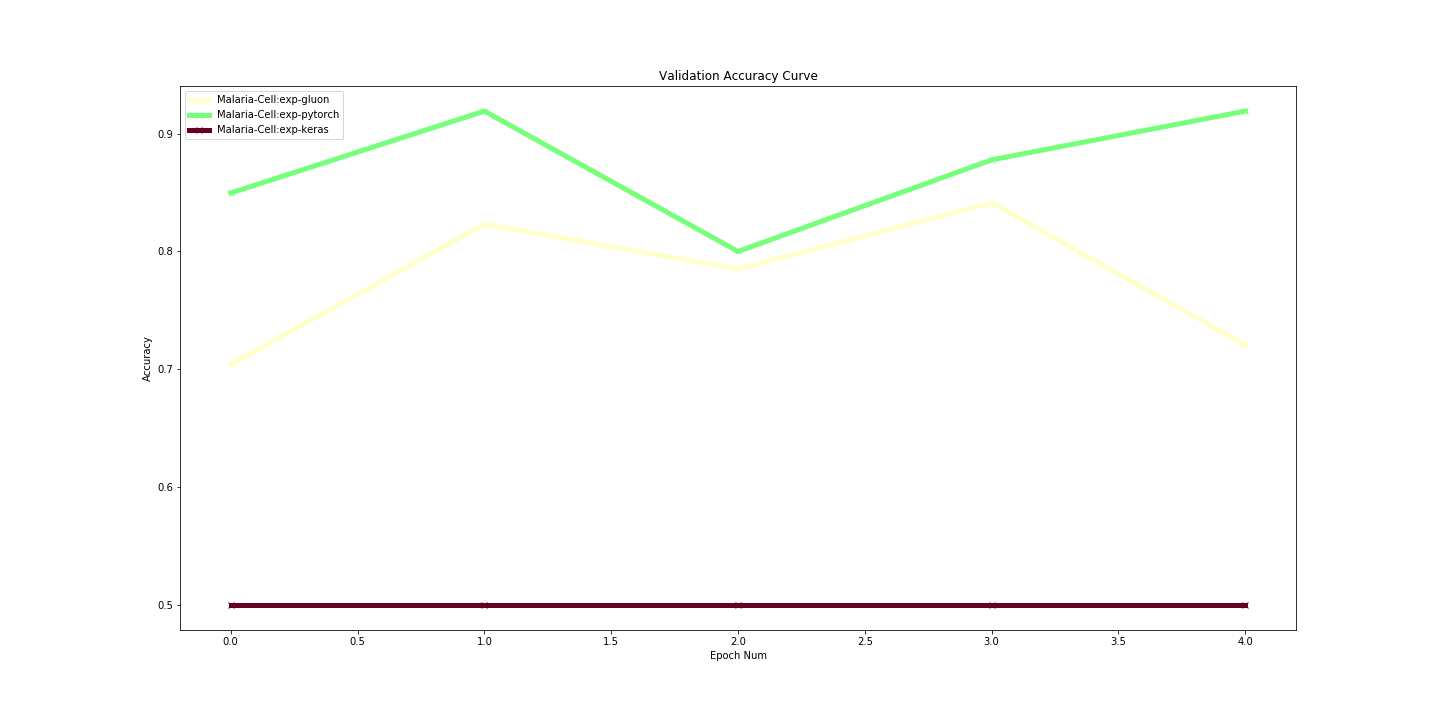

In [31]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/val_accuracy.png") 

### Validation loss curves

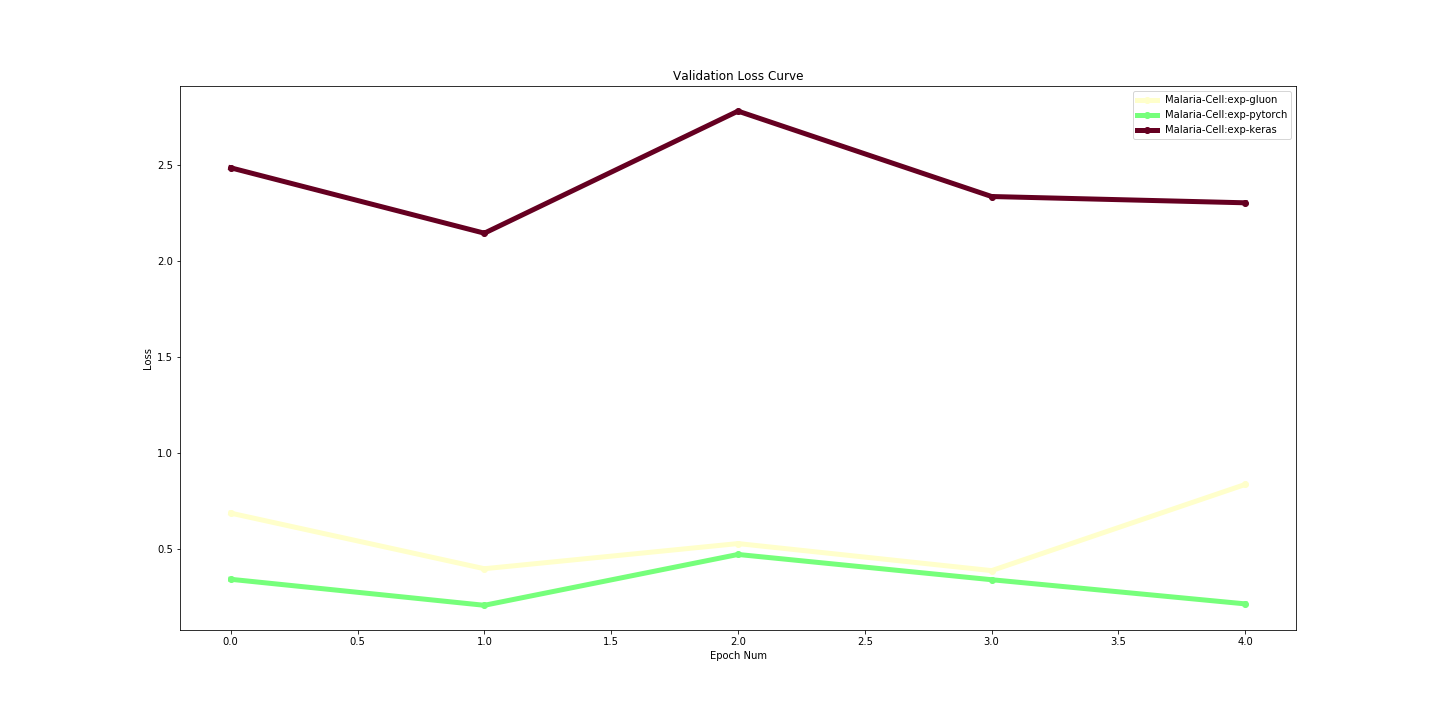

In [39]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/val_loss.png") 

### Training time curves

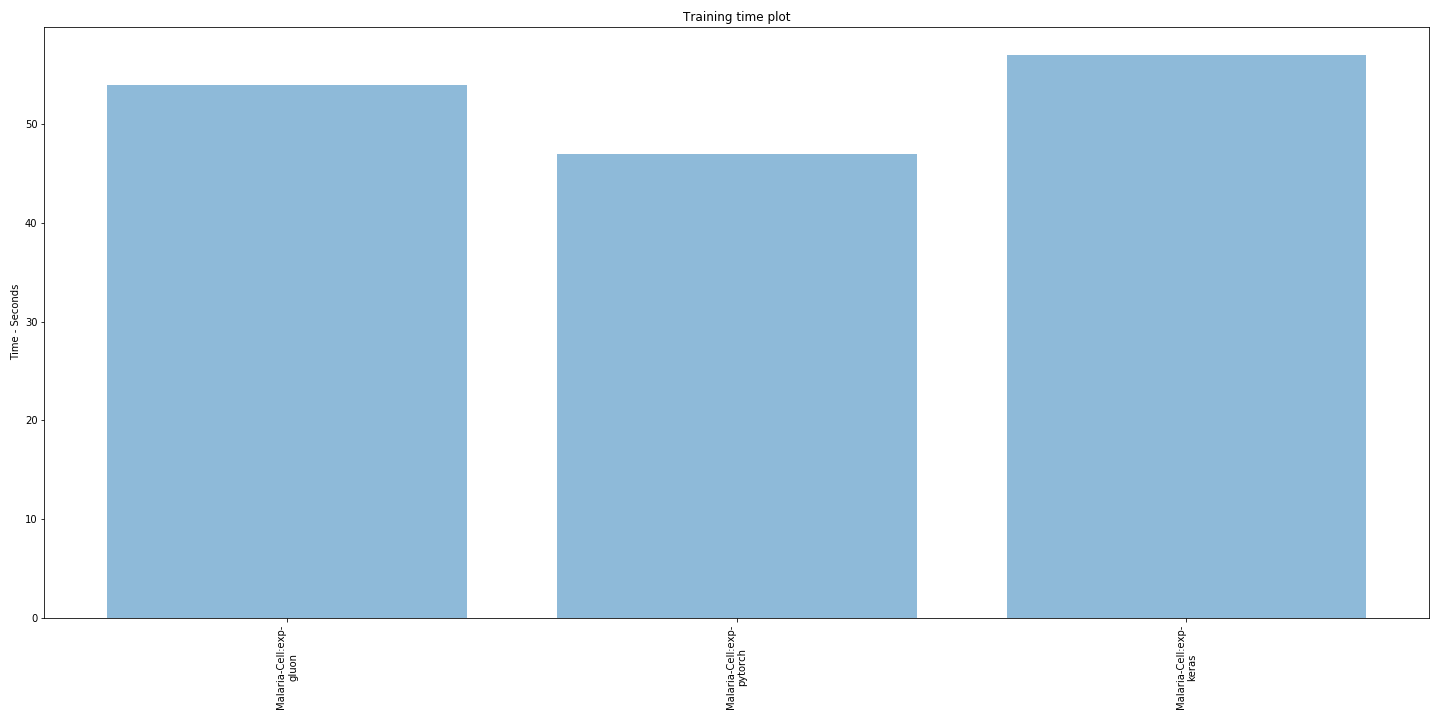

In [38]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/stats_training_time.png") 

### Max GPU usages

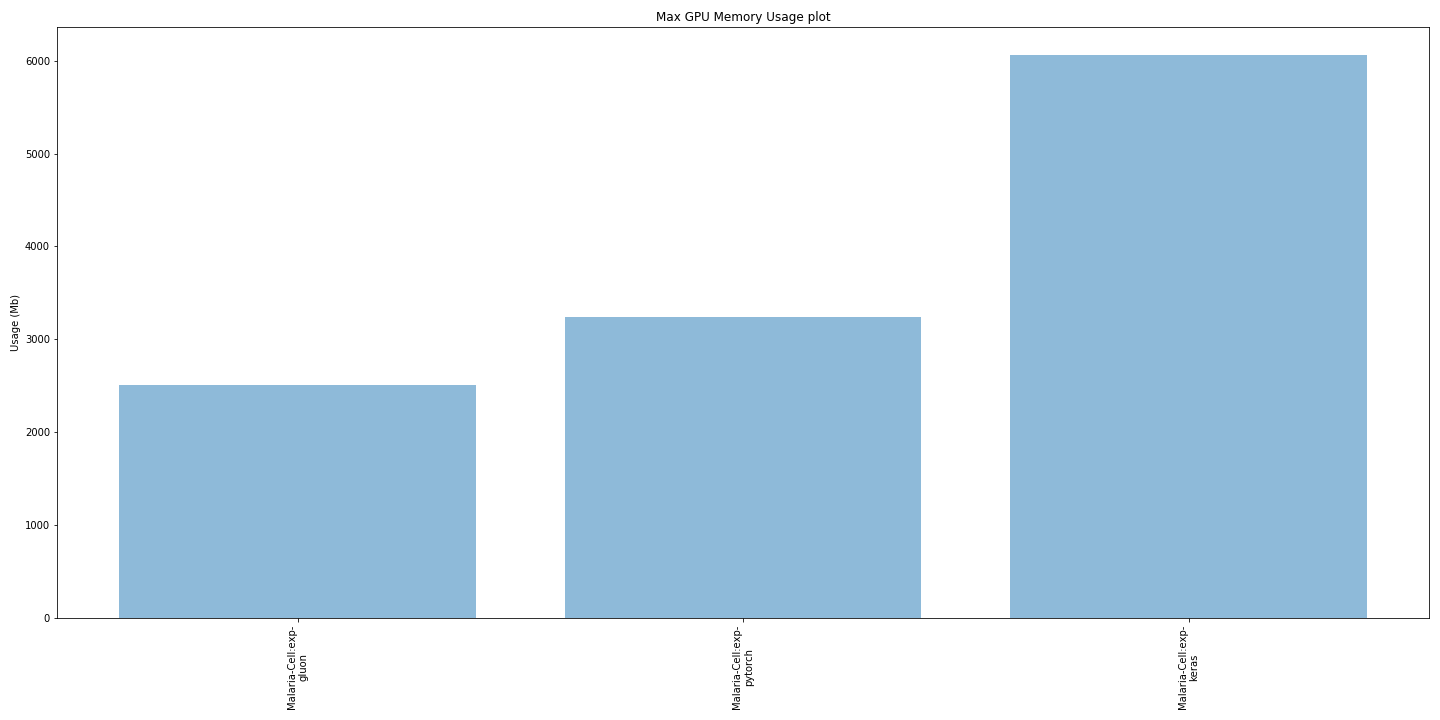

In [37]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/stats_max_gpu_usage.png") 

### Best Validation accuracies

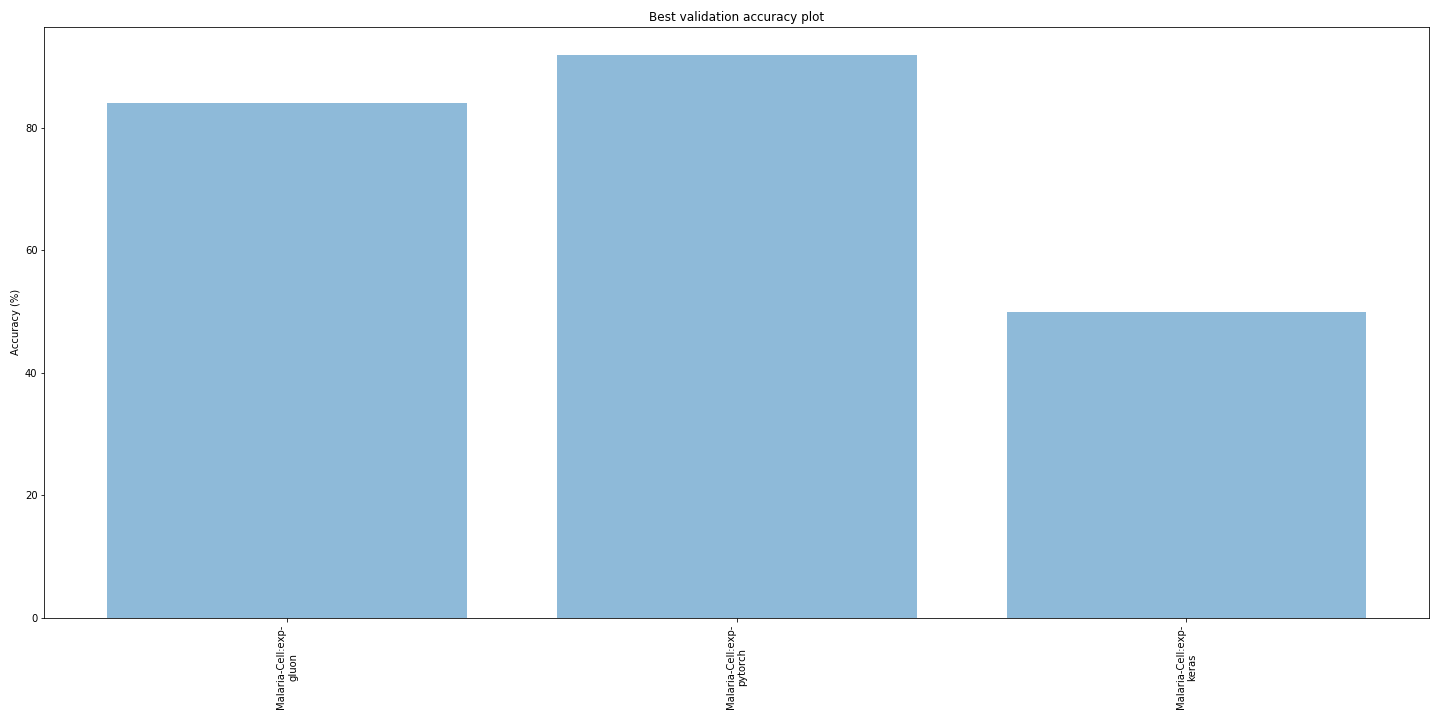

In [36]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-2/stats_best_val_acc.png") 